In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
from numpy import random
from numpy.linalg import inv
import os
import scipy
from scipy import stats
from scipy.stats import skew,kurtosis
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t
from statsmodels import stats
from statsmodels.stats import  weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

**1.	Load the dataset and display the structure (rows, columns, data types).**

In [ ]:
df  = pd.read_csv('/content/used_cars_data.csv')

In [ ]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**2.	Identify and handle missing values across the dataset.**

In [ ]:
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


1. columns Mileage,Engine,Power,Seats,New_Price,Price have null values we need to handle them using fillna()
2. Instead of removing the record that have NaN values we will impute the values using median for continuous and discrete data and using mode for categorical data

In [ ]:
df['Price'].fillna(df['Price'].median(), inplace=True)

<ipython-input-9-87bca2358bf4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].median(), inplace=True)


**3.	Check for duplicate entries.**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Conclusion**
1. there are no duplicated values in the dataset

# **Descriptive Analysis**

**1.	Generate summary statistics (mean, median, std. dev., etc.) for numeric features like Price, Mileage, Power, Engine, Kilometers_Driven.**

In [ ]:
# the columns Mileage,Power,Engine have string units with it like 'CC','BHP' and 'KMPL'
# before generating summary statistics we need to handle them
# convert these column to string so that we can use regex to remove units from them
df['Mileage'] = df['Mileage'].astype(str).str.lower()
df['Engine'] = df['Engine'].astype(str).str.lower()
df['Power'] = df['Power'].astype(str).str.lower()

# Remove units from them using regex
df['Mileage'] = df['Mileage'].str.replace(r'[a-z/]+', '', regex=True).str.strip()
df['Engine'] = df['Engine'].str.replace(r'[a-z/]+', '', regex=True).str.strip()
df['Power'] = df['Power'].str.replace(r'[a-z/]+', '', regex=True).str.strip()

# convert columns back to numeric type now we can use describe()
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

col_names = ['Price', 'Mileage', 'Power', 'Engine', 'Kilometers_Driven']
print(df[col_names].describe())


             Price      Mileage        Power       Engine  Kilometers_Driven
count  7253.000000  7251.000000  7078.000000  7207.000000       7.253000e+03
mean      8.826235    18.141580   112.765214  1616.573470       5.869906e+04
std      10.293313     4.562197    53.493553   595.285137       8.442772e+04
min       0.440000     0.000000    34.200000    72.000000       1.710000e+02
25%       3.850000    15.170000    75.000000  1198.000000       3.400000e+04
50%       5.640000    18.160000    94.000000  1493.000000       5.341600e+04
75%       8.400000    21.100000   138.100000  1968.000000       7.300000e+04
max     160.000000    33.540000   616.000000  5998.000000       6.500000e+06


**2.	Analyze the distribution of categorical features like Fuel_Type, Transmission, Owner_Type, and Location.**

In [ ]:
col_names = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
print(df['Fuel_Type'].value_counts(normalize=True)*100)
print(df['Transmission'].value_counts(normalize=True)*100)
print(df['Owner_Type'].value_counts(normalize=True)*100)
print(df['Location'].value_counts(normalize=True)*100)

Fuel_Type
Diesel      53.109058
Petrol      45.843099
CNG          0.854819
LPG          0.165449
Electric     0.027575
Name: proportion, dtype: float64
Transmission
Manual       71.749621
Automatic    28.250379
Name: proportion, dtype: float64
Owner_Type
First             82.062595
Second            15.883083
Third              1.888874
Fourth & Above     0.165449
Name: proportion, dtype: float64
Location
Mumbai        13.084241
Hyderabad     12.077761
Coimbatore    10.643872
Kochi         10.643872
Pune          10.547360
Delhi          9.099683
Kolkata        9.016958
Chennai        8.148352
Jaipur         6.879912
Bangalore      6.066455
Ahmedabad      3.791535
Name: proportion, dtype: float64


# Visual Explorations

**3.	Create histograms and boxplots for numerical features like Price, Engine, and Mileage.**

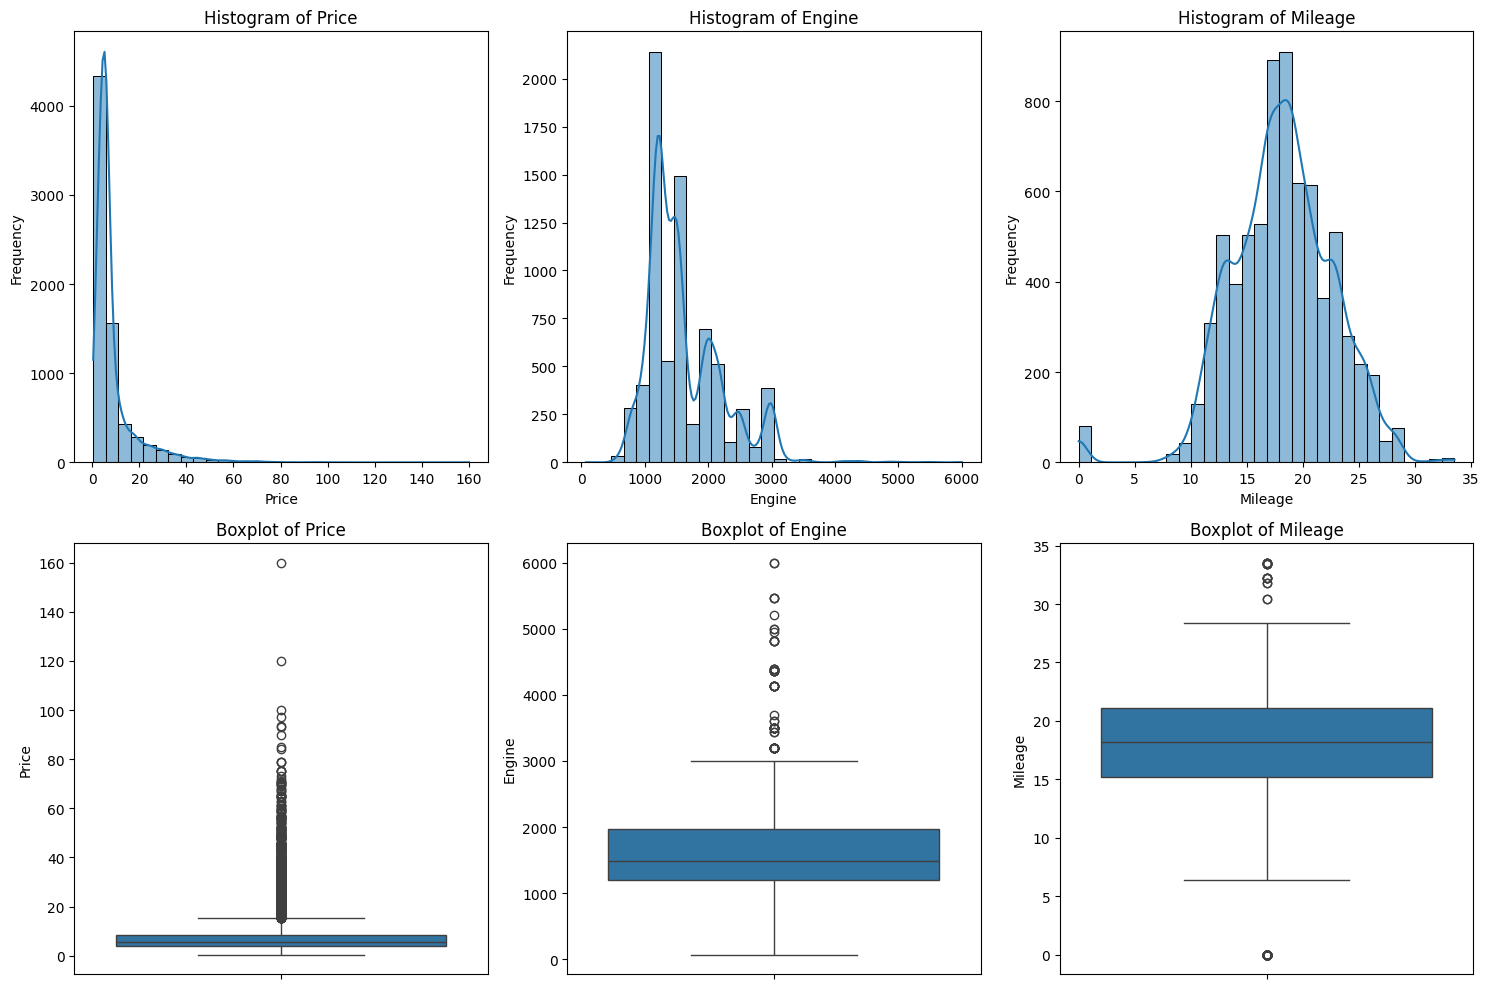

In [ ]:
columns_to_plot = ['Price', 'Engine', 'Mileage']
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
  plt.subplot(2, 3, i + 1)
  sns.histplot(df[col].dropna(), kde=True, bins=30)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

   # Boxplot
  plt.subplot(2, 3, i + 4)
  sns.boxplot(y=df[col].dropna())
  plt.title(f'Boxplot of {col}')
  plt.ylabel(col)
plt.tight_layout()
plt.show()

**4.	Plot bar charts showing the frequency of different Fuel_Type, Transmission, and Owner_Type.**

<ipython-input-21-1c4c8c7e6bd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
<ipython-input-21-1c4c8c7e6bd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
<ipython-input-21-1c4c8c7e6bd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


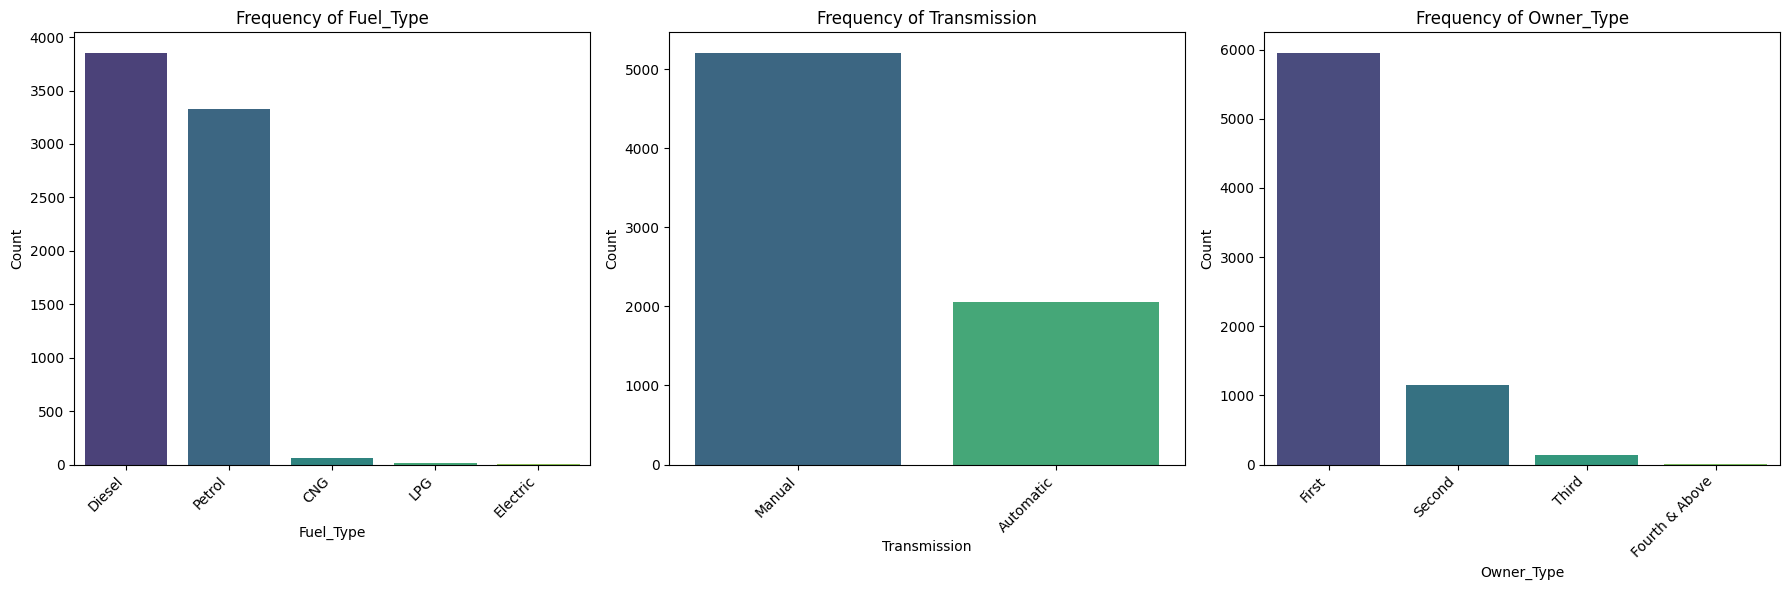

In [ ]:
columns_to_plot = ['Fuel_Type', 'Transmission', 'Owner_Type']
plt.figure(figsize=(18, 6))
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

**5.	Visualize the trend of average car prices over Year of manufacture.**

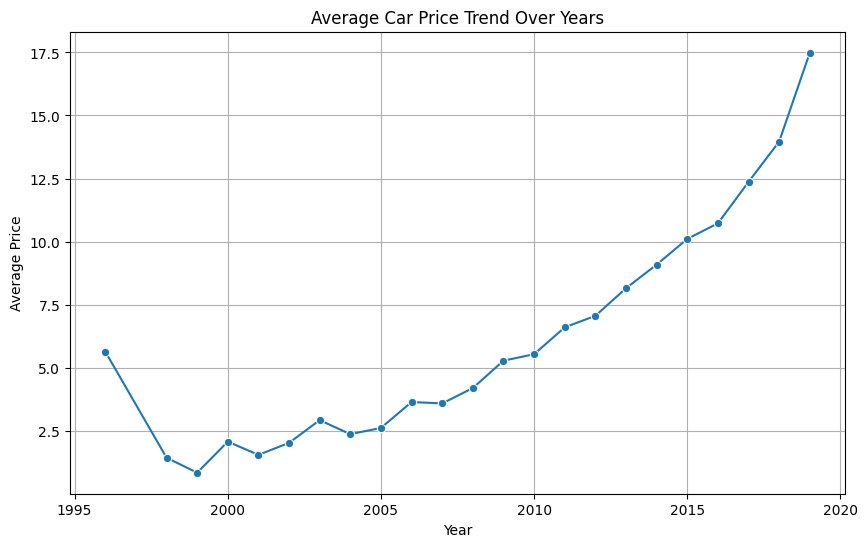

In [ ]:
plt.figure(figsize=(10, 6))
average_price_per_year = df.groupby('Year')['Price'].mean().reset_index()
sns.lineplot(data=average_price_per_year, x='Year', y='Price', marker='o')
plt.title('Average Car Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**6.	Compare price distributions across different Locations and Fuel_Types.**

<ipython-input-23-9735cdf6bbbf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Location', y='Price', palette='coolwarm')


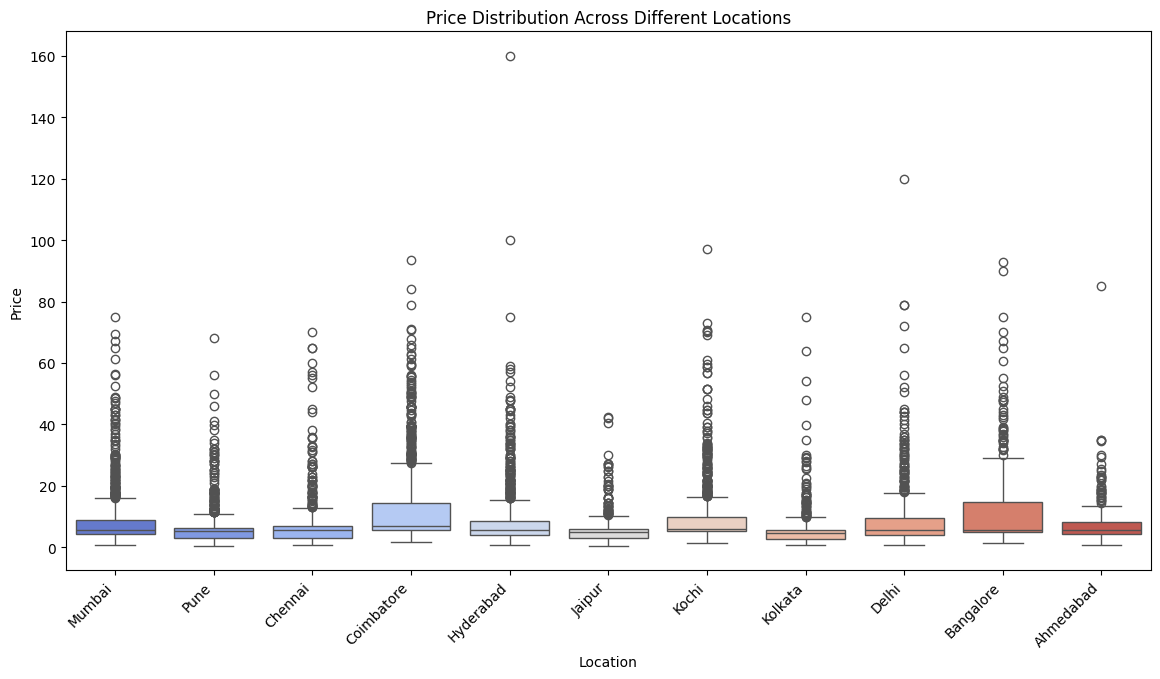

<ipython-input-23-9735cdf6bbbf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel_Type', y='Price', palette='plasma')


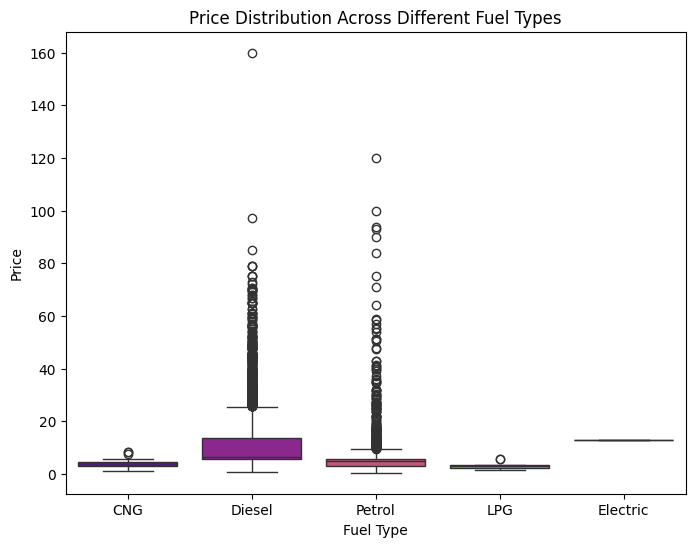

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Location', y='Price', palette='coolwarm')
plt.title('Price Distribution Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Fuel_Type', y='Price', palette='plasma')
plt.title('Price Distribution Across Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

**7.	Compute a correlation matrix for numerical columns and visualize it using a heatmap.**

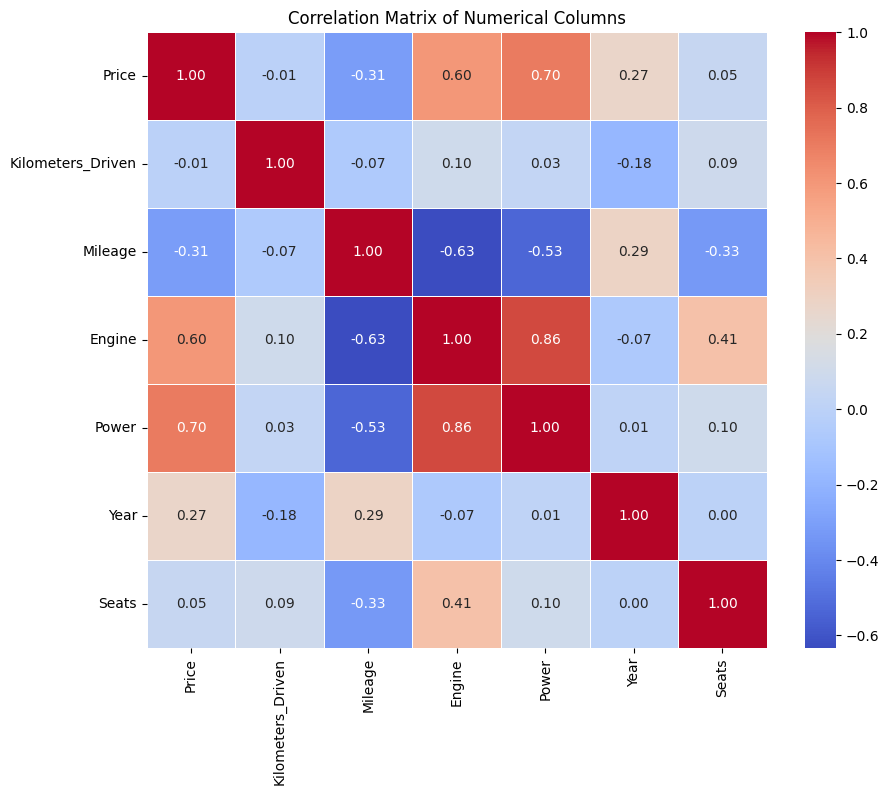

In [ ]:
numerical_columns = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Year', 'Seats']
df_corr_temp = df[numerical_columns].dropna()
correlation_matrix = df_corr_temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


**8.	Use scatter plots to analyze relationships between Price and key numerical variables (Mileage, Engine, Power, Kilometers_Driven).**

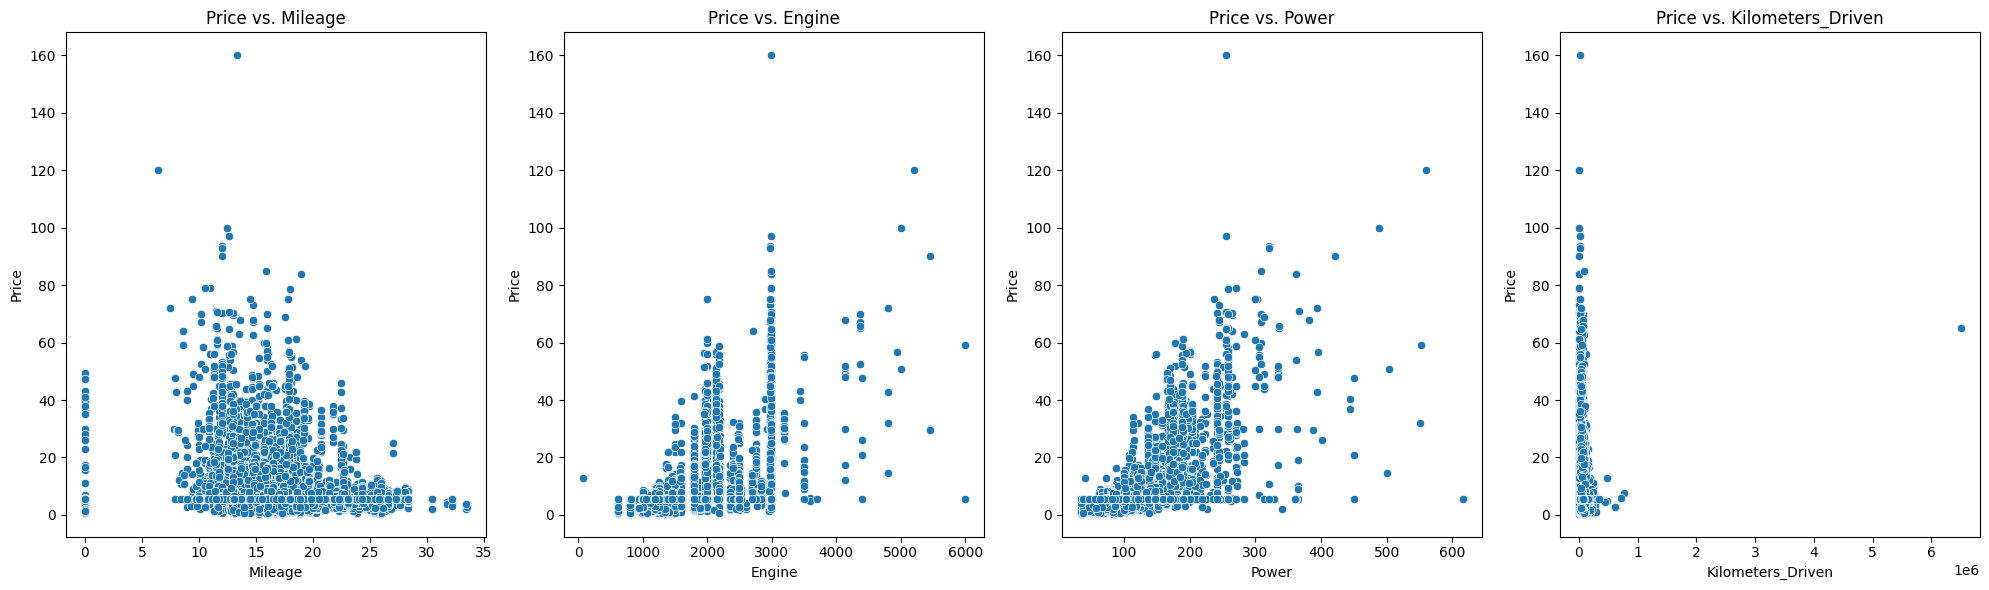

In [ ]:
key_numerical_columns = ['Mileage', 'Engine', 'Power', 'Kilometers_Driven']
plt.figure(figsize=(20, 6))
for i, col in enumerate(key_numerical_columns):
    plt.subplot(1, len(key_numerical_columns), i + 1)
    sns.scatterplot(x=col, y='Price', data=df.dropna(subset=[col, 'Price']))
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

**9.	Analyze multivariate interactions such as how Transmission and Fuel_Type together affect Price.**

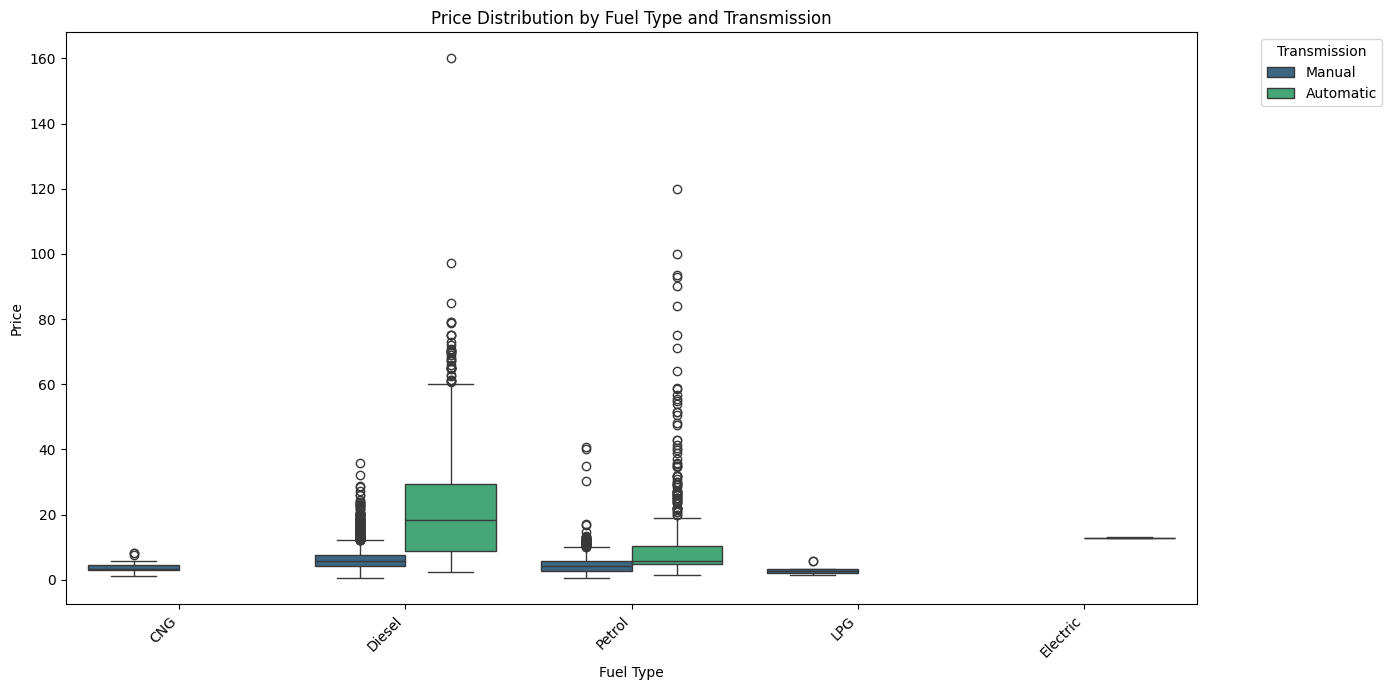

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Fuel_Type', y='Price', hue='Transmission', data=df.dropna(subset=['Price', 'Fuel_Type', 'Transmission']), palette='viridis')
plt.title('Price Distribution by Fuel Type and Transmission')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Outliers and Data Quality

**10.	Use boxplots to identify outliers in Price, Engine, and Power.**

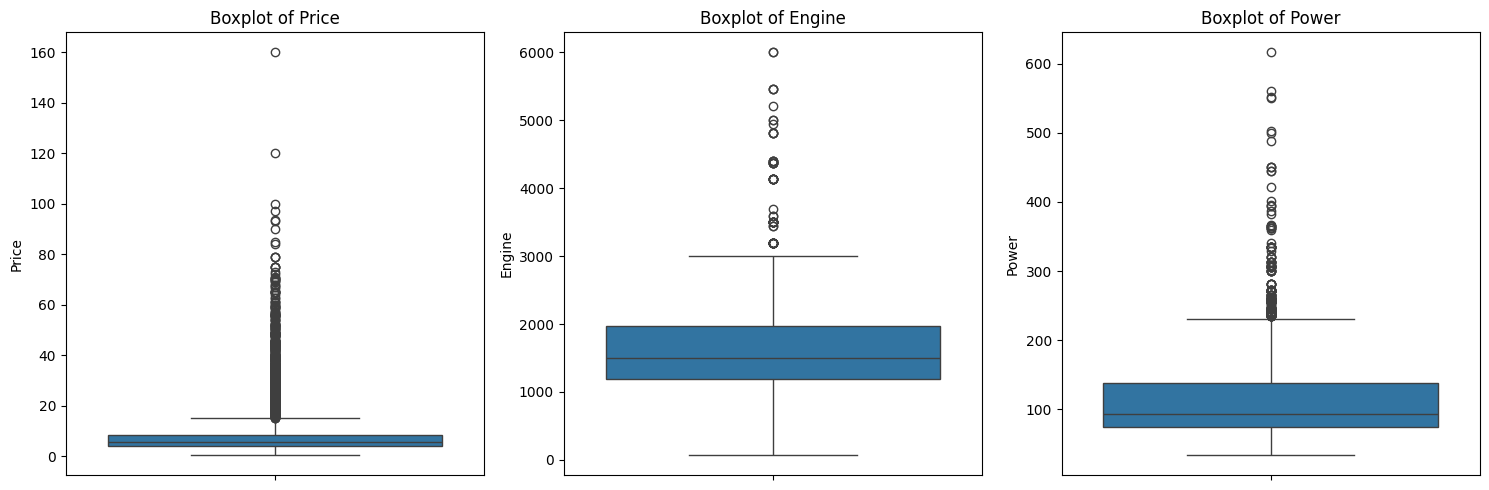

In [ ]:
outlier_columns = ['Price', 'Engine', 'Power']
plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_columns):
    plt.subplot(1, len(outlier_columns), i + 1)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**11.	Identify features with possible inconsistencies (e.g., non-numeric Power, ambiguous Mileage units).**

In [ ]:
inconsistency_check_columns = ['Mileage', 'Engine', 'Power']
for col in inconsistency_check_columns:
    print(df[col].isnull().sum())


2
46
175


**12.	Analyze the New_Price feature and its missing data—what percentage is missing and how might this affect modeling**

In [ ]:
new_price_missing_count = df['New_Price'].isnull().sum()
new_price_total_rows = len(df)
new_price_missing_percentage = (new_price_missing_count / new_price_total_rows) * 100
print(f"  Total rows: {new_price_total_rows}")
print(f"  Missing values in 'New_Price': {new_price_missing_count}")
print(f"  Percentage of missing values in 'New_Price': {new_price_missing_percentage:.2f}%")

# With 86.13% missing data, 'New_Price' might not be a reliable feature for direct use in predictive modeling

  Total rows: 7253
  Missing values in 'New_Price': 6247
  Percentage of missing values in 'New_Price': 86.13%


# Insights and Trends

**13.	Determine the most and least expensive car models and their characteristics.**

In [ ]:
car_models = df.groupby('Name')[['Price', 'Mileage', 'Engine', 'Power', 'Year', 'Kilometers_Driven']].mean().sort_values(by='Price', ascending=False)
print("\nTop 5 Most Expensive Car Models (Average Price):")
print(car_models.head(5))
print("\nTop 5 Least Expensive Car Models (Average Price):")
print(car_models.head(5))


Top 5 Most Expensive Car Models (Average Price):
                                               Price  Mileage  Engine  Power  \
Name                                                                           
Land Rover Range Rover 3.0 Diesel LWB Vogue  160.000    13.33  2993.0  255.0   
Lamborghini Gallardo Coupe                   120.000     6.40  5204.0  560.0   
Jaguar F Type 5.0 V8 S                       100.000    12.50  5000.0  488.1   
BMW 7 Series 740Li                            93.335    12.05  2979.0  320.0   
Mercedes-Benz SLK-Class 55 AMG                90.000    12.00  5461.0  421.0   

                                               Year  Kilometers_Driven  
Name                                                                    
Land Rover Range Rover 3.0 Diesel LWB Vogue  2017.0            25000.0  
Lamborghini Gallardo Coupe                   2011.0             6500.0  
Jaguar F Type 5.0 V8 S                       2015.0             8000.0  
BMW 7 Series 740Li      

**14.	Compare the average price of cars based on number of previous owners.**

<ipython-input-43-455035057823>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=owner_price.index, y=owner_price.values, palette='coolwarm')


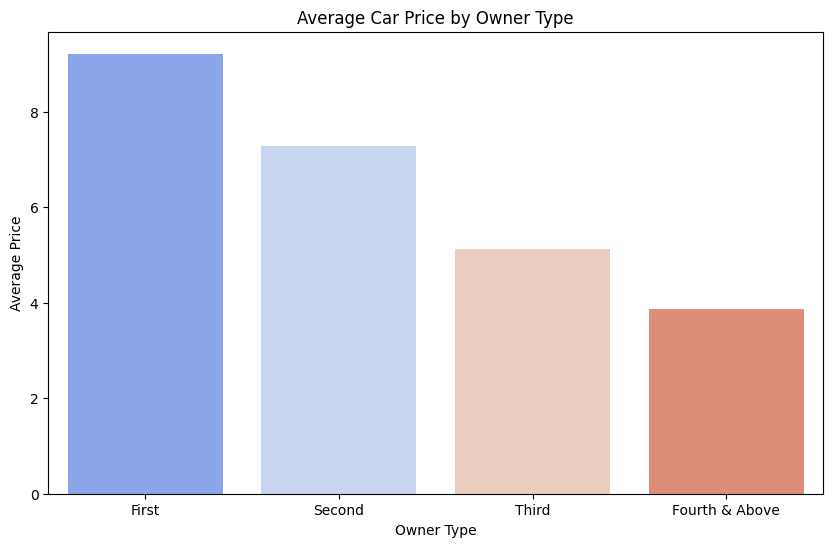

In [ ]:
owner_price = df.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=owner_price.index, y=owner_price.values, palette='coolwarm')
plt.title('Average Car Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Average Price')
plt.show()


**15.	Evaluate how mileage efficiency correlates with car price and manufacturing year.**

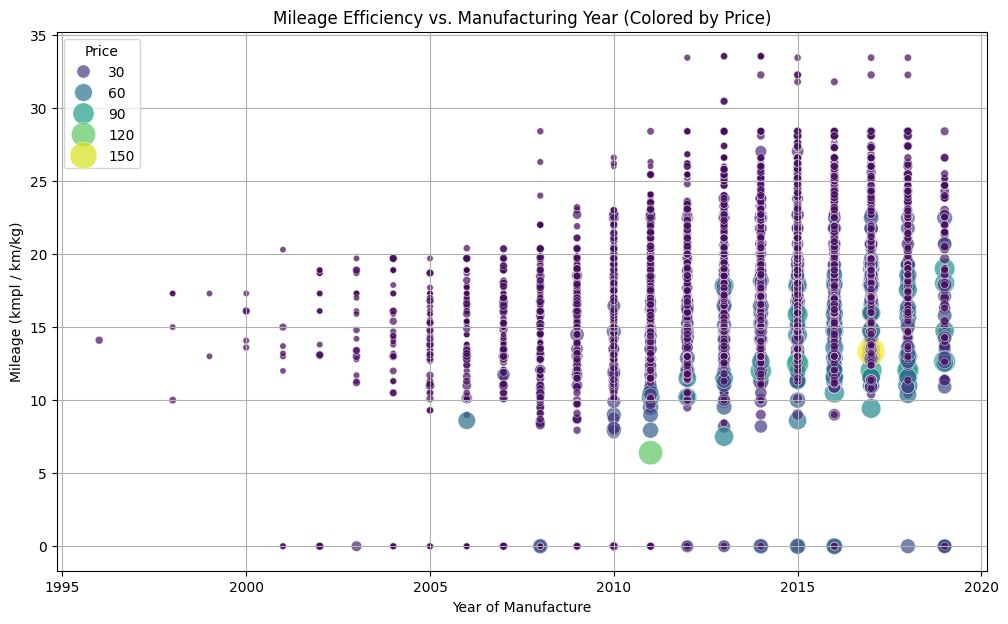

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Year', y='Mileage', hue='Price', data=df, size='Price', sizes=(20, 400), palette='viridis', alpha=0.7)
plt.title('Mileage Efficiency vs. Manufacturing Year (Colored by Price)')
plt.xlabel('Year of Manufacture')
plt.ylabel('Mileage (kmpl / km/kg)')
plt.grid(True)

# Predictive Readiness

**16.	Assess which features could be strong predictors of the Price.**

In [ ]:
numerical_columns = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Year', 'Seats']
df_corr_temp = df[numerical_columns].dropna()
correlation_matrix = df_corr_temp.corr()
print(correlation_matrix['Price'].sort_values(ascending=False))


Price                1.000000
Power                0.704706
Engine               0.601594
Year                 0.270842
Seats                0.049397
Kilometers_Driven   -0.007820
Mileage             -0.309379
Name: Price, dtype: float64


1. 'Power', 'Engine', and 'Year' show strong positive correlations with 'Price'.
2. 'Kilometers_Driven' and 'Mileage' show negative correlations with 'Price'.

# Conclusion

1. **Strong Positive Correlation:** Power, Engine capacity, and Year of manufacture show a strong positive correlation with Price.

2. **Negative Correlation:** Kilometers_Driven and Mileage efficiency show a negative correlation with Price, indicating that older cars with more mileage tend to be cheaper.

3. **Ownership:** Cars with fewer previous owners (e.g., 'First Owner') tend to have higher average prices.

4. **Fuel Types:** Diesel and Petrol vehicles dominate the market and command higher prices compared to CNG and LPG, which are more budget-friendly. Electric cars are a small segment but show a narrow price range.

5. **Manufacturer Years:** Newer cars (higher Year) generally have higher prices, reflecting depreciation over time.

6. We identified and handled missing values, especially in Mileage, Engine, Power, and critically analyzed the high percentage of missing data in New_Price, discussing its implications and potential handling strategies for modeling. Duplicate entries were checked and removed. Outliers in Price, Engine, and Power were identified using boxplots.


